# Volatility Regime Prediction Checkpoint 2

## Overview
For the second part of our project, we focused on improving our volatilty regime prediction algorithm and implementing a portfolio trading strategy using the data from our regime prediction algorithm. The trading strategy considers a diverse portfolio of ETFs. When our regime prediction says we will be in a low-vol environment next week, then our strategy uses equal weighting to our portfolio; however, when the prediction for next week's volatility is high-vol, then the portfolio adjusts from equal weighting to min-vol weighting. To find the min-vol weighting we used the scipy.optimize package, and leveraged the sco.minimize function to find weights that minimize volatilty over the previous two weeks.

With the random forest, our algorithm provides probabilities for a high-vol regime and low-vol regime for next week. Instead of investing all money into our high/low vol portfolios, we invest a percent based on the probability the random forest gives us that next week will either be high/low vol. In short, the random forest is known as the "black box" algorithm. It constructs multiple decision trees that output a classiefier prediction and randomizes each tree to protect against overfitting of the data. The result of all the individual trees becomes our random forest prediction. 

## Random Forest Demonstration
We will be constructing our predictions with the data from the Vol_Data Class. This data is made up of data from the FRED database and ETF data. Our goal is to use relevant data from a variety of sources to use for our predictions.

### FRED IDs with labels:
#### - DCOILBRENTEU: European Brent Oil Prices
#### - BAMLH0A0HYM2: US high yield index option-adjusted spread
#### - GOLDAMGBD228NLBM: Gold fixing price in London Bullion
#### - DAAA: Moody's corporate bond yield
#### - RIFSPPFAAD01NB: Overnight commercial paper interest rate
#### - BAMLHE00EHYIOAS: Euro high yield index option-adjusted spread
#### - T10Y3M:10 year treasury bond minus 3 month treasury bond
#### - BAMLEMFSFCRPITRIV:Emerging markets corporate bond yields
#### - DEXCHUS: Daily China/US Exchange Rates
#### - DEXUSEU: Daily US/EU Exchange Rates

### Other data 
#### - GDX_Volume: Weekly Volume of the GDX etf, which tracks gold miners
#### - SHY_Volume: Weekly Volume of the SHY etf, which is a 1-3 yr treasury bond fund
#### - SPY_Volume: Weekly Volume of the SPY etf, representing the S&P500

## Portfolio Class 
The Portfolio class that we created takes in start_date, end_date, tickers, and an object from our Regime_Predict class. Within the class, there is a weekly_optimization function that performs our trading strategy by investing proper amounts into our min_vol and equally weighted portfolios. The file also contains various portfolio functions such as functions to create returns matrices, calculate portfolio returns/vol, and the function that uses sco.minimize to find the minimum vol weights for a portfolio. 

## ETFs For Portfolio
#### - PNQI: NASDAQ Internet ETF  
#### - SPY: SPDR S&P 500 ETF Trust
#### - SPXL: Direxion Daily S&P 500 Bull 3X
#### - XLK: Technology Select Sector SPDR Fund
#### - XLY: Consumer Discretionary SPDR
#### - XLF: Financial Select Sector SPDR Fund
#### - SHY: iShares Barclay 1-3 Year Treasury Bond Fund


## Vol_Outputs Class
Within our main.py file, we have a Vol_Outputs class that is meant to tie together all of our other classes to provide outputs. Vol_Outputs takes in start_date, end_date, tickers, and fred_strings. From here, in its constructor, the class creates Vol_Data, Regime_Predict, and Portfolio objects which we use to find outputs. 

The Vol_Outputs class currently contains compare_equal, compare_spy, and analyze_volatile_periods methods. Each of these methods is defined to show users how our strategy performs against various benchmarks.
    1. compare_equal: compares how our strategy did against a strategy that equally weights our tickers the entire time
    2. compare_spy: compares how our strategy did against the SPY
    3. analyze_volatile_periods: Shows how our strategy performed during the market's most volatile periods compared to the equally weighted portfolio and the SPY 

In [1]:
import os
from Code.Data.Inputs import volClass 

start_date = "2008-01-01"
end_date="2020-06-20"
tickers = ["PNQI", "SPY","SPXL", "XLK", "XLY", "XLF","SHY"]
fred_s=["DCOILBRENTEU" ,"BAMLH0A0HYM2", "GOLDAMGBD228NLBM","DAAA","RIFSPPFAAD01NB","BAMLHE00EHYIOAS", "DEXCHUS", "DEXUSEU", "T10Y3M", "BAMLEMFSFCRPITRIV"]
trial_vol = volClass.Vol_Data(start_date, end_date, fred_strings = fred_s)

C:\Users\Vincent\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


2919
2922


In [2]:
from Code.Data import rfClass

# Regime_Predict(Vol_Data object, test_size = .3, n_estimators= 10) we chose default test data size as .3 and n_estimators for random forest as 10
trial_regime_prediction = rfClass.Regime_Predict(trial_vol)

In [3]:
trial_regime_prediction.corr

,DCOILBRENTEU,BAMLH0A0HYM2,GOLDAMGBD228NLBM,DAAA,RIFSPPFAAD01NB,BAMLHE00EHYIOAS,DEXCHUS,DEXUSEU,T10Y3M,BAMLEMFSFCRPITRIV,SPY_Volume,SHY_Volume,GDX_Volume
DCOILBRENTEU,1.000000,-0.185451,0.295570,0.329633,-0.096654,-0.053281,-0.422428,0.720567,0.351440,-0.371904,0.118888,-0.259546,-0.569171
BAMLH0A0HYM2,-0.185451,1.000000,-0.442276,0.522395,-0.192980,0.969430,0.272005,0.302653,0.365306,-0.731025,0.739510,-0.037067,-0.353128
GOLDAMGBD228NLBM,0.295570,-0.442276,1.000000,-0.652199,-0.236732,-0.367496,-0.330019,-0.189624,-0.346524,0.445012,-0.325519,0.157479,0.070483
DAAA,0.329633,0.522395,-0.652199,1.000000,-0.036770,0.554666,0.146260,0.745644,0.767593,-0.859868,0.621102,-0.290504,-0.578587
RIFSPPFAAD01NB,-0.096654,-0.192980,-0.236732,-0.036770,1.000000,-0.212543,0.560878,-0.106751,-0.621332,0.276571,-0.101259,0.152499,0.086715
BAMLHE00EHYIOAS,-0.053281,0.969430,-0.367496,0.554666,-0.212543,1.000000,0.231359,0.372743,0.406048,-0.777788,0.729127,-0.083503,-0.464165
DEXCHUS,-0.422428,0.272005,-0.330019,0.146260,0.560878,0.231359,1.000000,-0.081517,-0.263825,-0.036627,0.182892,0.132230,-0.001029
DEXUSEU,0.720567,0.302653,-0.189624,0.745644,-0.106751,0.372743,-0.081517,1.000000,0.645306,-0.778872,0.477632,-0.309178,-0.724965
T10Y3M,0.351440,0.365306,-0.346524,0.767593,-0.621332,0.406048,-0.263825,0.645306,1.000000,-0.766219,0.453501,-0.347275,-0.480461
BAMLEMFSFCRPITRIV,-0.371904,-0.731025,0.445012,-0.859868,0.276571,-0.777788,-0.036627,-0.778872,-0.766219,1.000000,-0.731068,0.329085,0.694588


#### The code above is the correlation matrix between all our variables. Below are the actualy probabilites between the regimes and then the finalized predictions. 

In [4]:
trial_regime_prediction.all_prob

,Low_Vol,Med_Vol,High_Vol
Week,,,
2008-01-07,0.40,0.60,0.00
2008-01-14,0.06,0.91,0.03
2008-01-22,0.07,0.87,0.06
2008-01-28,0.03,0.79,0.18
2008-02-04,0.06,0.94,0.00
...,...,...,...
2020-05-18,0.09,0.54,0.37
2020-05-26,0.13,0.66,0.21
2020-06-01,0.21,0.28,0.51


In [5]:
trial_regime_prediction.all_predictions_df

,Vol_Regime
Week,
2008-01-07,0
2008-01-14,0
2008-01-22,0
2008-01-28,0
2008-02-04,0
...,...
2020-05-18,0
2020-05-26,0
2020-06-01,1


#### Now we will search through hundreds of forests to find the best input parameters for our random forest.

In [11]:
trial_regime_prediction.best_params()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


{'n_estimators': 1600, 'max_features': 'auto', 'max_depth': None}


In [13]:
estimators = 1600
features = 'auto'
depth = None
optimal_regime_prediction = rfClass.Regime_Predict(trial_vol, n_estimators = estimators, max_features = features, max_depth = depth)

#### Now we will look at the feature importance of the variables we used in our trial_regime_prediction. 

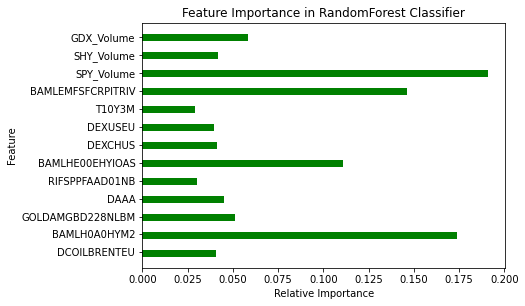

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 10 (0.190845)
2. feature 1 (0.174082)
3. feature 9 (0.146494)
4. feature 5 (0.110784)
5. feature 12 (0.058137)
6. feature 2 (0.051372)
7. feature 3 (0.045232)
8. feature 11 (0.041961)
9. feature 6 (0.041246)
10. feature 0 (0.040739)
11. feature 7 (0.039507)
12. feature 4 (0.030330)
13. feature 8 (0.029270)


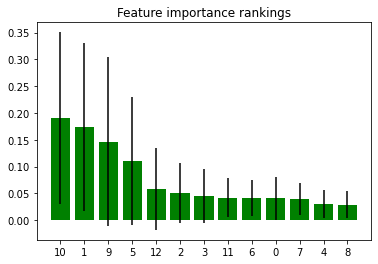

In [14]:
trial_regime_prediction.plot_feature_importances()

trial_regime_prediction.plot_feature_rankings()

#### For comparison, here are the feature importances from our optimal forest parameters. 

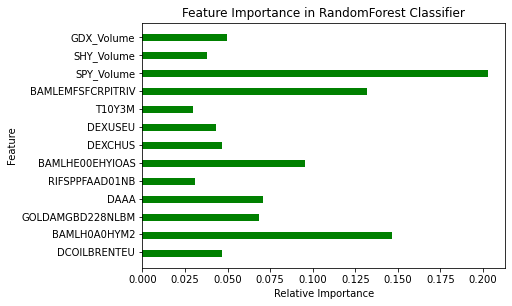

<Figure size 360x360 with 0 Axes>

Feature ranking:
1. feature 10 (0.202755)
2. feature 1 (0.146590)
3. feature 9 (0.131816)
4. feature 5 (0.095426)
5. feature 3 (0.071056)
6. feature 2 (0.068311)
7. feature 12 (0.049602)
8. feature 0 (0.046935)
9. feature 6 (0.046536)
10. feature 7 (0.042974)
11. feature 11 (0.037694)
12. feature 4 (0.030717)
13. feature 8 (0.029588)


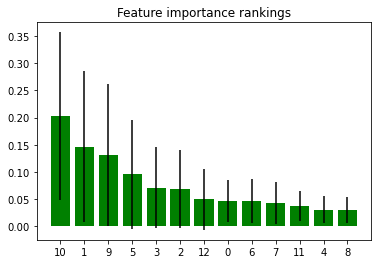

In [15]:
optimal_regime_prediction.plot_feature_importances()

optimal_regime_prediction.plot_feature_rankings()

### Classification Report

Precision: TP / TP + FP -- Out of all the positive classes we have predicted correctly, how many are positive. 

Recall: TP / TP + FN -- Out of all positive classes, how much we have predicted correctly. 

f1-score: Weighted average between precision and recall scores

Support: Number of occurences of each label in the true data set. 

Macro and weighted avg look at the data holistically, and then makes the same calculations - weighted is similar to macro, but accounts for label imbalance, by taking the weighted mean of the metrics for each data label, where macro takes an unweighted mean. 


### Confusion Matrix
This visualizes the classification report, showing which were correctly predicted, as well as the False Positives and False Negatives.

              precision    recall  f1-score   support

          -1       0.87      0.98      0.92       127
           0       0.68      0.58      0.63        45
           1       0.93      0.57      0.70        23

    accuracy                           0.84       195
   macro avg       0.83      0.71      0.75       195
weighted avg       0.83      0.84      0.83       195

Confusion Matrix: 


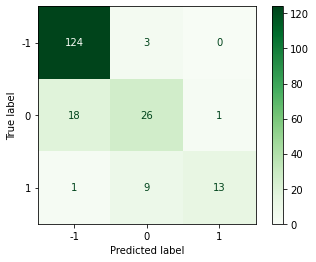

In [7]:
trial_regime_prediction.classification_report()
trial_regime_prediction.confusion_matrix()

#### For comparison, let us view the Confusion Matrix and Classification Report from our optimized forest parameters.

              precision    recall  f1-score   support

          -1       0.88      0.93      0.91       124
           0       0.76      0.63      0.69        51
           1       0.83      0.95      0.88        20

    accuracy                           0.85       195
   macro avg       0.82      0.83      0.83       195
weighted avg       0.85      0.85      0.85       195

Confusion Matrix: 


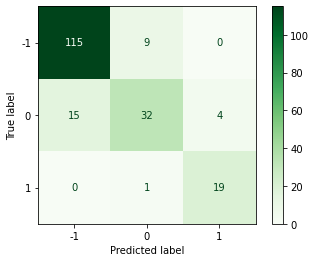

In [16]:
optimal_regime_prediction.classification_report()
optimal_regime_prediction.confusion_matrix()

In [17]:
from Code.main.main import Vol_Outputs

n_estimators = 1600
max_features = 'auto'
max_depth = None
v_trial = Vol_Outputs(start_date, end_date, tickers, fred_s, n_estimators, max_features, max_depth)

2919
2922


#### The code above creates a Vol_Outputs object called v_trial. From v_trial, we can generate the outputs that we want.

In [18]:
print(v_trial.compare_equal())
print("\n\n",v_trial.compare_spy())
x= v_trial.analyze_volatile_periods()
for i in x.keys():
    print("\n\n", x[i])

                 Optimized_Port  Equal_Weight
Metric (Annual)                              
Return                 0.135361      0.125920
Volatiltiy             0.120205      0.234504


                  Optimized_Port       SPY
Metric (Annual)                          
Return                 0.135361  0.100477
Volatiltiy             0.120205  0.194535


                                  Optimized_Port  Equal_Weight_Port       SPY
Metrics 2009-01-26 - 2009-03-26                                             
Return                                 0.511367           0.255883  0.000000
Volatilty                              0.111349           0.506826  0.417252
VaR                                   -0.183152          -0.833654 -0.686319


                                  Optimized_Port  Equal_Weight_Port       SPY
Metrics 2010-05-26 - 2010-07-26                                             
Return                                 0.040054           0.208752  0.204596
Volatilty              

As can be seen from the above outputs, the optimized portfolio tends to outperform on both an annual basis and when broken down into the highest volatility regimes. 